In [83]:
from ipywidgets import widgets, Layout
import os
from yellowbrick.regressor import CooksDistance
import warnings
from plotly.subplots import make_subplots
import datetime
import statsmodels.api as sm
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
# renderer for jupyter notebook
pio.renderers.default = 'notebook'
# renderer for vs code
# pio.renderers.default='vscode'
# renderer for colab
# pio.renderers.default='colab'
pio.templates.default = "plotly_white"
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [84]:
rain = pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions = list(rain.columns.values)[5:]
years = list(rain['year'].unique())
monsoon_list = [i for i in range(150, 281)]
rain_monsoon = rain[rain['day-number'].isin(monsoon_list)]

In [85]:
rain = rain.set_index('date', drop=False)

In [86]:
# rain considered from Day number 150 to 280

### Plotting Functions

In [87]:
# dropdown widget
region = widgets.Dropdown(
    options=regions,
    value=regions[0], description='Region',layout=Layout(margin='20px 20px 20px 20px'))
container=widgets.HBox([region])

In [88]:
def initial_plot(x_axis,df,iterate_list,title,x_axis_title):
#     list_type=year
    traces=[]
    if len(iterate_list)==0:
        traces.append(go.Scatter(x=df[x_axis],y=df[regions[0]],name=regions[0]))
    else:
        for i in iterate_list:
            temp = df[df['year'] == i]
            traces.append(go.Scatter(x=temp[x_axis],y=temp[regions[0]],name=str(i)))
    layout = go.Layout(title=dict(text=title),xaxis=dict(title=x_axis_title,rangeslider=dict(visible=True)),yaxis=dict(title='Rainfall (mm)'))
    return go.FigureWidget(data=traces, layout=layout)

In [89]:
def plot_fig(id_r,title,x_axis,g,data,iterate_list):
    var={i.split()[0].lower():i for i  in regions}
    id_region=var[id_r]
    with g.batch_update():
        if len(iterate_list)!=0:
            for i in iterate_list:
                df = data[data['year'] == i]
                g.data[i-1957].y=df[id_region]
                g.data[i-1957].name=str(i)
                g.data[i-1957].x=df[x_axis]
        else:
            g.data[0].y=data[id_region]
            g.data[0].name=str(title)
            g.data[0].x=data[x_axis]

In [90]:
def response(change):
    val=region.value.split()[0].lower()
    plot_fig(val,region.value,'day-number',g,rain_monsoon,years)
    plot_fig(val,region.value,'month',g_mean_monthly_year,mean_monthly_year,years)
    plot_fig(val,region.value,'month',g_median_monthly_year,median_monthly_year,years)
    plot_fig(val,region.value,'year',g_mean_yearly,mean_yearly,[])
    plot_fig(val,region.value,'year',g_median_yearly,median_yearly,[])
    plot_fig(val,region.value,'day-number',g_mean_daily,mean_daily,[])
    plot_fig(val,region.value,'day-number',g_median_daily,median_daily,[])
    plot_fig(val,region.value,'day-number',g_mean_daily_monsoon,mean_daily_monsoon,[])
    plot_fig(val,region.value,'day-number',g_median_daily_monsoon,median_daily_monsoon,[])

In [91]:
region.observe(response,names='value')

## MEAN AND MEDIAN

In [92]:
rain.fillna(0)
rain_monsoon.fillna(0)

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
149,1957,150,1957-05-30,5,30,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
150,1957,151,1957-05-31,5,31,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
151,1957,152,1957-06-01,6,1,0.45,0.00,0.00,0.0,0.0,...,0.76,1.04,0.11,0.00,0.93,0.00,0.72,0.00,0.00,0.62
152,1957,153,1957-06-02,6,2,8.79,4.41,0.00,0.0,0.0,...,4.41,7.36,2.06,0.00,6.37,1.30,5.13,0.62,0.00,8.22
153,1957,154,1957-06-03,6,3,3.22,6.68,13.52,0.0,0.0,...,1.02,6.15,5.26,10.91,1.66,1.89,4.59,10.02,3.05,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,2012,276,2012-10-02,10,2,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20364,2012,277,2012-10-03,10,3,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20365,2012,278,2012-10-04,10,4,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20366,2012,279,2012-10-05,10,5,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [93]:
mean_monthly_year = rain.groupby(['year', 'month'], as_index=False).mean()
median_monthly_year = rain.groupby(['year', 'month'], as_index=False).median()

In [94]:
mean_yearly = rain.groupby(['year'], as_index=False).mean()
median_yearly = rain.groupby(['year'], as_index=False).median()

In [95]:
mean_daily = rain.groupby(['day-number'], as_index=False).mean()
median_daily = rain.groupby(['day-number'], as_index=False).median()

In [96]:
mean_daily_monsoon = rain_monsoon.groupby(['day-number'], as_index=False).mean()
median_daily_monsoon = rain_monsoon.groupby(['day-number'], as_index=False).median()

In [97]:
dict_rain_regions = {}
dict_rain_monsoon_regions = {}

dict_rain_regions_yearly = {}
dict_rain_regions_monthly = {}
dict_rain_regions_year_monthly = {}

dict_rain_monsoon_regions_yearly = {}
dict_rain_monsoon_regions_monthly = {}
dict_rain_monsoon_regions_year_monthly = {}

for i in regions:
    dict_rain_regions[i] = rain[['year', 'day-number', 'date', 'month',
                                 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_monsoon_regions[i] = rain_monsoon[['year', 'day-number',
                                                 'date', 'month', 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_regions_yearly[i] = dict_rain_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_regions_monthly[i] = dict_rain_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i] = dict_rain_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i]['year'] = dict_rain_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_regions_year_monthly[i]['month'] = dict_rain_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_regions_year_monthly[i]['month']

    dict_rain_monsoon_regions_yearly[i] = dict_rain_monsoon_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_monsoon_regions_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i]['year'] = dict_rain_monsoon_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['month'] = dict_rain_monsoon_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_monsoon_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_monsoon_regions_year_monthly[i]['month']

### ARIMA MODELLING

In [98]:
rain.head()

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
date,,,,,,,,,,,,,,,,,,,,,
1957-01-01,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957-01-02,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957-01-03,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957-01-04,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957-01-05,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
rain_monsoon.head()

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
149,1957,150,1957-05-30,5,30,0.00,0.00,0.00,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
150,1957,151,1957-05-31,5,31,0.00,0.00,0.00,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
151,1957,152,1957-06-01,6,1,0.45,0.00,0.00,NaN,0.0,...,0.76,1.04,0.11,0.00,0.93,0.00,0.72,0.00,0.00,0.62
152,1957,153,1957-06-02,6,2,8.79,4.41,0.00,NaN,0.0,...,4.41,7.36,2.06,0.00,6.37,1.30,5.13,0.62,0.00,8.22
153,1957,154,1957-06-03,6,3,3.22,6.68,13.52,NaN,0.0,...,1.02,6.15,5.26,10.91,1.66,1.89,4.59,10.02,3.05,0.58


In [100]:
g_mean_yearly=initial_plot('year',mean_yearly,[],'Mean rain observed on yearly basis','Year')
g_median_yearly=initial_plot('year',median_yearly,[],'Median rain observed on yearly basis','Year')
display(region,g_mean_yearly,g_median_yearly)

Dropdown(description='Region', layout=Layout(margin='20px 20px 20px 20px'), options=('ajmer', 'alwar', 'banswa…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': 'e48a6adc-…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': '2f569f7b-…

In [101]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [81]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:32248.136690633324
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:29268.241117349153
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:11095.514321946976
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10571.718882851972
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11077.245727600837
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10076.166534478074
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:11023.775971419615
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10525.366440987686
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:29241.290300316097
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26246.701791672043
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8556.829036030504
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8051.033277562029
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11196.425547954077
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8788.075238532738
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8490.230783908715
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8009.418063376266
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3202.9344347979695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3202.51209311734

In [82]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8948      0.022     40.469      0.000       0.851       0.938
ma.L1         -1.3255      0.059    -22.375      0.000      -1.442      -1.209
ar.S.L12      -0.0011      0.001     -1.049      0.294      -0.003       0.001
ma.S.L12      -1.0000      7.183     -0.139      0.889     -15.078      13.078
sigma2         0.1256      0.903      0.139      0.889      -1.645       1.896


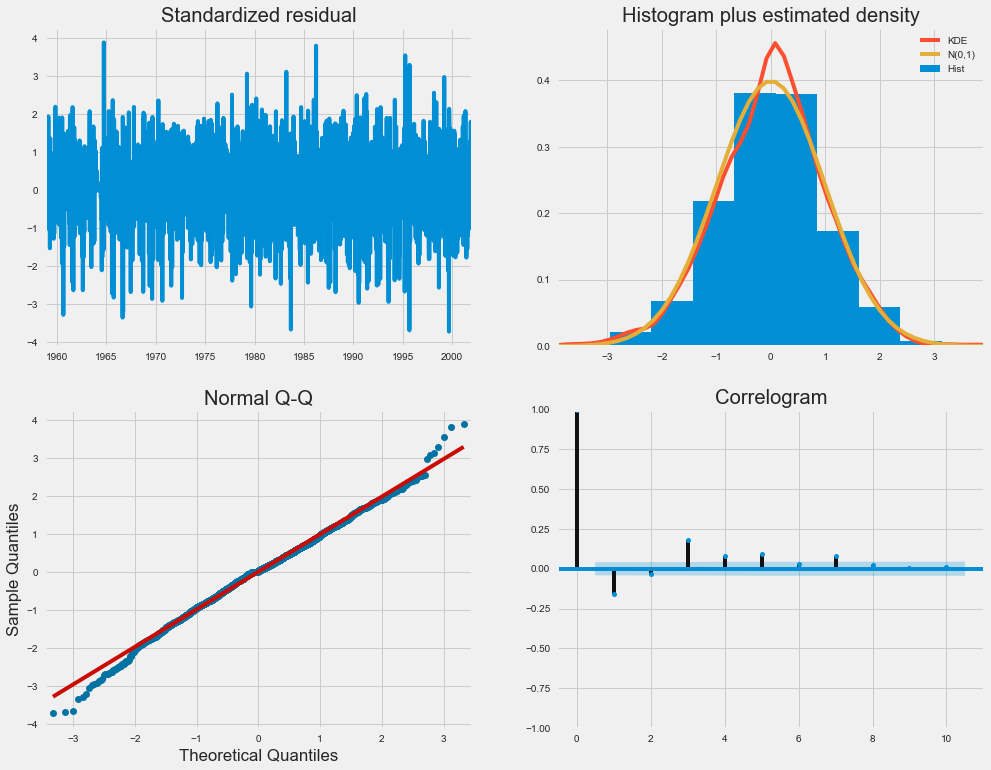

In [102]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()